<h2 align="center">Linear Regression (from scratch)</h2>

### 1: Load the Libraries and Data
---

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('bike_sharing_data.txt', delimiter=',')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
# drop nan
data = data.dropna()

In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 2: Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000s vs City Population')

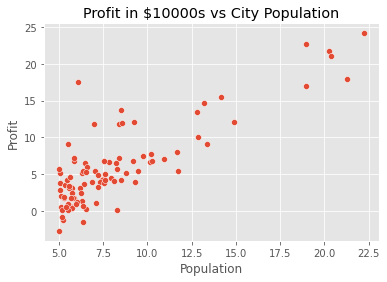

In [7]:
ax = sns.scatterplot(x='Population', y='Profit', data=data, palette='bright')
ax.set_title('Profit in $10000s vs City Population')

### 3: Prepare Datasets
---

In [8]:
def prepare_X_y(data, y_column, m):
    X_columns = [c for c in data.columns if c != y_column]
    X = data.loc[:, X_columns]
    X = np.append(np.ones((m, 1)), X, axis=1)
    y = data.loc[:, y_column].values.reshape(m, 1)
    return X, y

def split_train_test_datasets(data, y_column, test_frac, random_state):
    test_data  = data.sample(frac=test_frac, random_state=random_state)
    train_data = data.loc[~data.index.isin(test_data.index)]
    X_train, y_train = prepare_X_y(train_data, y_column, m=train_data.shape[0])
    X_test, y_test = prepare_X_y(test_data, y_column, m=test_data.shape[0])
    return X_train, y_train, X_test, y_test

def initialize_theta(num_features):
    theta = np.zeros((num_features, 1))
    return theta

In [9]:
y_col = 'Profit'
num_features = data.columns.size
X_train, y_train, X_test, y_test = split_train_test_datasets(data, y_col, test_frac=0.2, random_state=37)
theta = initialize_theta(num_features)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78, 2), (78, 1), (19, 2), (19, 1))

In [11]:
print(theta)
theta.shape

[[0.]
 [0.]]


(2, 1)

### 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = x\theta = \sum_{j=1}^{n} {\theta_j x_j}$$

and

`m = number of instances` 
`n = number of features`

In [12]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)                
    error = (y_pred - y) ** 2          
    return 1 / (2 * m) * np.sum(error)

In [13]:
print(X_train[0], y_train[0])
cost_function(X_train, y_train, theta)

[1.     6.1101] [17.592]


35.781893619212184

### 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [14]:
def gradient_descent(X, y, alpha, iterations):
    m = len(y)
    costs = []
    theta = initialize_theta(X.shape[1])
    for i in range(iterations):
        y_pred = X.dot(theta)
        propagated_error = np.dot(X.transpose(), (y_pred - y))
        theta = theta - alpha * (1/m) * propagated_error
        costs.append(cost_function(X, y, theta))
        if i % 200 == 0: 
            print("Iteration %4d: MSE = %.5f" % (i+1, costs[-1]))
    
    print("Iteration %4d: MSE = %.5f" % (i+1, costs[-1]) )
    return theta, costs

In [15]:
theta, costs = gradient_descent(X_train, y_train, alpha=0.01, iterations=2000)

Iteration    1: MSE = 6.79628
Iteration  201: MSE = 5.54691
Iteration  401: MSE = 5.18330
Iteration  601: MSE = 5.02019
Iteration  801: MSE = 4.94701
Iteration 1001: MSE = 4.91419
Iteration 1201: MSE = 4.89946
Iteration 1401: MSE = 4.89286
Iteration 1601: MSE = 4.88989
Iteration 1801: MSE = 4.88857
Iteration 2000: MSE = 4.88797


### 6: Plotting the Convergence
---

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

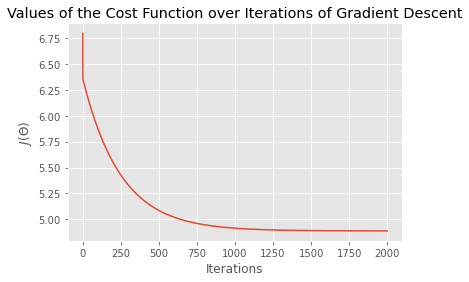

In [16]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")

### 7: Visualising the Cost Function $J(\theta)$
---

Min cost: theta_0 = 4.797979797979798, theta_1 = 0.15151515151515138


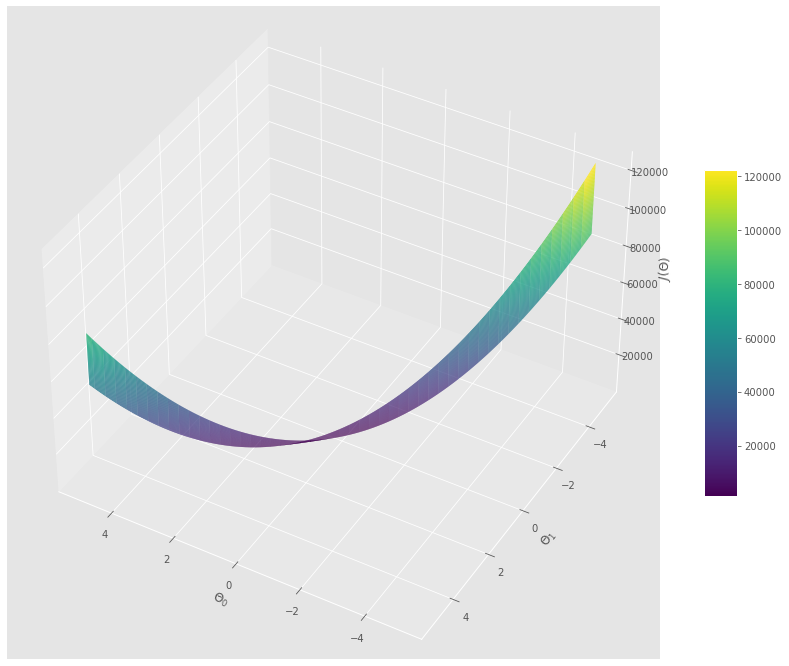

In [17]:
from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(-5, 5, 100)
theta_1 = np.linspace(-5, 5, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

min_cost = float('inf')
min_cost_i = 0
min_cost_j = 0
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X_train, y_train, t)
        if min_cost > cost_values[i, j]:
            min_cost = cost_values[i, j]
            min_cost_i = i
            min_cost_j = j
            
            
fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(40, 120)

print("Min cost: theta_0 = {}, theta_1 = {}".format( theta_0[min_cost_i], theta_1[min_cost_j] ))
plt.show()

### 8: Training Data with Linear Regression Fit
---

In [18]:
print(theta.shape)
print(theta)
print("h(x) = {} + {}x".format(str(round(theta[0, 0], 2)), 
                               str(round(theta[1, 0], 2))))

(2, 1)
[[-3.67449666]
 [ 1.17518203]]
h(x) = -3.67 + 1.18x


Text(0.5, 1.0, 'Linear Regression Fit')

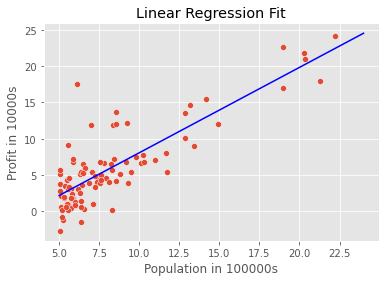

In [19]:
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1, 0] + theta[0, 0]) for x in x_value]
sns.lineplot(x=x_value, y=y_value, color='b')

plt.xlabel('Population in 100000s')
plt.ylabel('Profit in 10000s')
plt.title('Linear Regression Fit')

### 9: Inference on test dataset using the optimized $\theta$ values
---

In [20]:
# Evaluate performance on the test data
def predict(X, theta):
    y_pred = X.dot(theta)    
    return y_pred

In [21]:
y_pred = predict(X_test, theta)
mse_test = cost_function(X_test, y_test, theta)

print("For a population of {} people, the model predicts a profit of ${:.1f}".format(
    int(X_test[0][1]*10000), y_pred[0][0]*10000
))

print("For a population of {} people, the model predicts a profit of ${:.1f}".format(
    int(X_test[10][1]*10000), y_pred[10][0]*10000
))

print("MSE =", mse_test)


For a population of 58918 people, the model predicts a profit of $32494.4
For a population of 91801 people, the model predicts a profit of $71139.1
MSE = 2.816363354175214
